This file is part of https://github.com/diehlpk/reusommer21.

Copyright (c) 2021 Patrick Diehl
              2021 Autumn Edwards

This program is free software: you can redistribute it and/or modify  
it under the terms of the GNU General Public License as published by  
the Free Software Foundation, version 3.

This program is distributed in the hope that it will be useful, but 
WITHOUT ANY WARRANTY; without even the implied warranty of 
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU 
General Public License for more details.

You should have received a copy of the GNU General Public License along with this program. 
If not, see <http://www.gnu.org/licenses/>.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
h = 0.25

In [3]:
fFD =  1./(2.*h*h) 
fPD =  1./(8.*h/2*h/2) 

In [4]:
M = np.zeros([23,23])

In [5]:
M [0][0] = 1

In [6]:
for i in range (1,4):
    M [i][i-1] = -2 * fFD
    M [i][i] = 4 * fFD
    M [i][i+1] = -2 * fFD

Match the displacement $u_3$ and $u_5$

In [7]:
M [5][5] = -1
M [5][3] = 1

Match the displacement $u_4$ and $u_7$

In [8]:
M [4][4] = -1
M [4][7] = 1

Interpolate the displacement $u_6$ and $u_6'$

* $u_6'-u_6=0$
* $\frac{1}{2}\left(u_3 + u_4\right)-u_5=0$

In [9]:
M [6][6] = -1
M [6][3] = 1/2
M [6][4] = 1/2

Apply the non-local model

In [10]:
for i in range(7,16):
    M[i][i-2] = -1.  * fPD
    M[i][i-1] = -4. * fPD
    M[i][i] = 10. * fPD
    M[i][i+1] =  -4. * fPD
    M[i][i+2] = -1. * fPD

Interpolate the displacement $u_{16}$ and $u_{16}'$

In [11]:
M [16][16] = -1
M [16][18] = 1/2
M [16][19] = 1/2

Match the displacement $u_{17}$ and $u_{19}$

In [12]:
M [17][17] = -1
M [17][19] = 1

Match the displacement $u_{15}$ and $u_{18}$

In [13]:
M [18][18] = -1
M [18][15] = 1

In [14]:
for i in range (19,22):
    M [i][i-1] = -2  * fFD
    M [i][i] = 4 * fFD
    M [i][i+1] = -2 * fFD

In [15]:
M [22][22] = 1

In [16]:
M

array([[  1. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ],
       [-16. ,  32. , -16. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ],
       [  0. , -16. ,  32. , -16. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ],
       [  0. ,   0. , -16. ,  32. , -16. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. ,   0. ,  -1. ,   0. ,   0. ,   1. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. ,   1. ,   0. ,  -1. ,   0. ,   0. ,   0. ,

Contruct the force vector

In [17]:
f = np.zeros([23])

In [18]:
for i in range(1,22):
    f[i] =  8/9

In [19]:
f [4] = 0 # the displacememnt is matching therefore the force is zero
f [5] = 0 
f [6] = 0 
f [18] = 0 
f [16] = 0
f [17] = 0

In [20]:
f

array([0.        , 0.88888889, 0.88888889, 0.88888889, 0.        ,
       0.        , 0.        , 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.        , 0.        , 0.        , 0.88888889,
       0.88888889, 0.88888889, 0.        ])

In [21]:
u = np.linalg.solve(M,f)
u

array([1.11022302e-16, 2.95734628e-01, 5.35913701e-01, 7.20537219e-01,
       8.49605181e-01, 7.20537219e-01, 7.85071200e-01, 8.49605181e-01,
       8.97867314e-01, 9.32649420e-01, 9.53472429e-01, 9.60418938e-01,
       9.53472429e-01, 9.32649420e-01, 8.97867314e-01, 8.49605181e-01,
       7.85071200e-01, 7.20537219e-01, 8.49605181e-01, 7.20537219e-01,
       5.35913701e-01, 2.95734628e-01, 0.00000000e+00])

In [22]:
x1 = np.arange(0,1,0.25)
x2 = np.arange(1,2,0.125)
x3 = np.arange(2,3.25,0.25)
x20 = np.array(np.concatenate((x1,x2,x3)))
x20

array([0.   , 0.25 , 0.5  , 0.75 , 1.   , 1.125, 1.25 , 1.375, 1.5  ,
       1.625, 1.75 , 1.875, 2.   , 2.25 , 2.5  , 2.75 , 3.   ])

In [23]:
uSlice = np.array(np.concatenate((u[0:5],u[8:15],u[18:len(u)])))
uSlice

array([1.11022302e-16, 2.95734628e-01, 5.35913701e-01, 7.20537219e-01,
       8.49605181e-01, 8.97867314e-01, 9.32649420e-01, 9.53472429e-01,
       9.60418938e-01, 9.53472429e-01, 9.32649420e-01, 8.97867314e-01,
       8.49605181e-01, 7.20537219e-01, 5.35913701e-01, 2.95734628e-01,
       0.00000000e+00])

In [24]:
len(u)

23

In [25]:
len(uSlice)

17

In [26]:
len(x20)

17

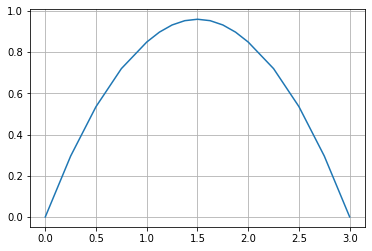

In [27]:
plt.plot(x20,uSlice)
plt.grid()

In [28]:
h2= 0.125

In [29]:
fFD2 =  1./(2.*h2*h2) 
fPD2 =  1./(8.*h2/2*h2/2) 

In [30]:
M2 = np.zeros([39,39])

In [31]:
M2 [0][0] = 1

In [32]:
for i in range (1, 8):
    M2[i][i-1]=-2 * fFD2
    M2[i][i]= 4 * fFD2
    M2[i][i+1]= -2 * fFD2

Match the dispacement between $u_7$ and $u_9$

In [33]:
M2[9][9]= -1
M2[9][7]=1

Match the dispacement between $u_8$ and $u_{11}$

In [34]:
M2[8][8]= -1
M2[8][11]=1

Interpolate the displacement $u_{10}$ and $u_{9}'$

* $u_{10}'-u_{10}=0$
* $\frac{1}{2}\left(u_7 + u_8\right)-u_{10}=0$

In [35]:
M2 [10][10] = -1
M2 [10][7] = 1/2
M2 [10][8] = 1/2

Apply the non-local model

In [36]:
for i in range(11,28):
    M2[i][i-2] = -1.  * fPD2
    M2[i][i-1] = -4. * fPD2
    M2[i][i] = 10. * fPD2
    M2[i][i+1] =  -4. * fPD2
    M2[i][i+2] = -1. * fPD2

Interpolate the displacement $u_{28}$ and $u_{28}'$

* $u_{28}'-u_{28}=0$
* $\frac{1}{2}\left(u_{30} + u_{31}\right)-u_{28}=0$

In [37]:
M2 [28][28] = -1
M2 [28][30] = 1/2
M2 [28][31] = 1/2

Match the displacement $u_{29}$ and $u_{31}$

In [38]:
M2 [29][29] = -1
M2 [29][31] = 1

Match the displacement $u_{27}$ and $u_{30}$

In [39]:
M2 [30][30] = -1
M2 [30][27] = 1

In [40]:
for i in range (31, 38):
    M2[i][i-1]=-2 * fFD2
    M2[i][i]= 4 * fFD2
    M2[i][i+1]= -2 * fFD2

In [41]:
M2 [38][38] = 1
M2

array([[  1.,   0.,   0., ...,   0.,   0.,   0.],
       [-64., 128., -64., ...,   0.,   0.,   0.],
       [  0., -64., 128., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ..., 128., -64.,   0.],
       [  0.,   0.,   0., ..., -64., 128., -64.],
       [  0.,   0.,   0., ...,   0.,   0.,   1.]])

In [42]:
f2 = np.zeros([39])

In [43]:
for i in range(1,38):
    f2[i] =  8/9

In [44]:
f2 [8] = 0 # the displacememnt is matching therefore the force is zero
f2 [9] = 0 
f2 [10] = 0 
f2 [30] = 0 
f2 [28] = 0
f2 [29] = 0
f2

array([0.        , 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.        , 0.        ,
       0.        , 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.        , 0.        ,
       0.        , 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.        ])

In [45]:
u2 = np.linalg.solve(M2,f2)
u2

array([1.16573418e-15, 1.57266990e-01, 3.00645092e-01, 4.30134304e-01,
       5.45734628e-01, 6.47446063e-01, 7.35268609e-01, 8.09202266e-01,
       8.69247034e-01, 8.09202266e-01, 8.39224650e-01, 8.69247034e-01,
       8.95201457e-01, 9.17785870e-01, 9.36880524e-01, 9.52505964e-01,
       9.64658667e-01, 9.73339235e-01, 9.78547566e-01, 9.80283678e-01,
       9.78547566e-01, 9.73339235e-01, 9.64658667e-01, 9.52505964e-01,
       9.36880524e-01, 9.17785870e-01, 8.95201457e-01, 8.69247034e-01,
       8.39224650e-01, 8.09202266e-01, 8.69247034e-01, 8.09202266e-01,
       7.35268609e-01, 6.47446063e-01, 5.45734628e-01, 4.30134304e-01,
       3.00645092e-01, 1.57266990e-01, 0.00000000e+00])

In [46]:
x4 = np.arange(0,1,0.125)
x5 = np.arange(1,2,0.0625)
x6 = np.arange(2,3.125,0.125)
x7 = np.array(np.concatenate((x4,x5,x6)))
x7

array([0.    , 0.125 , 0.25  , 0.375 , 0.5   , 0.625 , 0.75  , 0.875 ,
       1.    , 1.0625, 1.125 , 1.1875, 1.25  , 1.3125, 1.375 , 1.4375,
       1.5   , 1.5625, 1.625 , 1.6875, 1.75  , 1.8125, 1.875 , 1.9375,
       2.    , 2.125 , 2.25  , 2.375 , 2.5   , 2.625 , 2.75  , 2.875 ,
       3.    ])

In [47]:
uSlice2 = np.array(np.concatenate((u2[0:9],u2[12:27],u2[30:len(u2)])))
uSlice2

array([1.16573418e-15, 1.57266990e-01, 3.00645092e-01, 4.30134304e-01,
       5.45734628e-01, 6.47446063e-01, 7.35268609e-01, 8.09202266e-01,
       8.69247034e-01, 8.95201457e-01, 9.17785870e-01, 9.36880524e-01,
       9.52505964e-01, 9.64658667e-01, 9.73339235e-01, 9.78547566e-01,
       9.80283678e-01, 9.78547566e-01, 9.73339235e-01, 9.64658667e-01,
       9.52505964e-01, 9.36880524e-01, 9.17785870e-01, 8.95201457e-01,
       8.69247034e-01, 8.09202266e-01, 7.35268609e-01, 6.47446063e-01,
       5.45734628e-01, 4.30134304e-01, 3.00645092e-01, 1.57266990e-01,
       0.00000000e+00])

In [48]:
len(u2)

39

In [49]:
len(x7)

33

In [50]:
len(uSlice2)

33

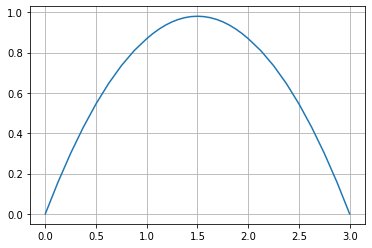

In [51]:
plt.plot(x7,uSlice2)
plt.grid()

In [52]:
h3=0.0625

In [53]:
fFD3 =  1./(2.*h3*h3) 
fPD3 =  1./(8.*h3/2*h3/2) 

In [54]:
M3 = np.zeros([71,71])

In [55]:
M3 [0][0] = 1

In [56]:
for i in range (1, 16):
    M3[i][i-1]=-2 * fFD3
    M3[i][i]= 4 * fFD3
    M3[i][i+1]= -2 * fFD3

Match the dispacement between $u_{15}$ and $u_{17}$

In [57]:
M3[17][17]= -1
M3[17][15]=1

Match the dispacement between $u_{16}$ and $u_{19}$

In [58]:
M3[16][16]= -1
M3[16][19]=1

Interpolate the displacement $u_{18}$ and $u_{18}'$

* $u_{18}'-u_{18}=0$
* $\frac{1}{2}\left(u_{15} + u_{16}\right)-u_{18}=0$

In [59]:
M3 [18][18] = -1
M3 [18][15] = 1/2
M3 [18][16] = 1/2

Apply the non-local model

In [60]:
for i in range(19,52):
    M3[i][i-2] = -1.  * fPD3
    M3[i][i-1] = -4. * fPD3
    M3[i][i] = 10. * fPD3
    M3[i][i+1] =  -4. * fPD3
    M3[i][i+2] = -1. * fPD3

Interpolate the displacement $u_{52}$ and $u_{52}'$

* $u_{52}'-u_{52}=0$
* $\frac{1}{2}\left(u_{54} + u_{55}\right)-u_{52}=0$

In [61]:
M3 [52][52] = -1
M3 [52][54] = 1/2
M3 [52][55] = 1/2

Match the displacement $u_{51}$ and $u_{54}$

In [62]:
M3 [54][54] = -1
M3 [54][51] = 1

Match the displacement $u_{53}$ and $u_{55}$

In [63]:
M3 [53][53] = -1
M3 [53][55] = 1

In [64]:
for i in range (55, 70):
    M3[i][i-1]=-2 * fFD3
    M3[i][i]= 4 * fFD3
    M3[i][i+1]= -2 * fFD3

In [65]:
M3 [70][70] = 1
M3

array([[   1.,    0.,    0., ...,    0.,    0.,    0.],
       [-256.,  512., -256., ...,    0.,    0.,    0.],
       [   0., -256.,  512., ...,    0.,    0.,    0.],
       ...,
       [   0.,    0.,    0., ...,  512., -256.,    0.],
       [   0.,    0.,    0., ..., -256.,  512., -256.],
       [   0.,    0.,    0., ...,    0.,    0.,    1.]])

In [66]:
f3 = np.zeros([71])

In [67]:
for i in range(1,70):
    f3[i] =  8/9

In [68]:
f3 [16] = 0 # the displacememnt is matching therefore the force is zero
f3 [17] = 0 
f3 [18] = 0 
f3 [52] = 0 
f3 [53] = 0
f3 [54] = 0
f3

array([0.        , 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.        , 0.        , 0.        , 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.        , 0.        , 0.        ,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.        ])

In [69]:
u3 = np.linalg.solve(M3,f3)
u3

array([1.33226763e-15, 8.09834143e-02, 1.58494606e-01, 2.32533576e-01,
       3.03100324e-01, 3.70194849e-01, 4.33817152e-01, 4.93967233e-01,
       5.50645092e-01, 6.03850728e-01, 6.53584143e-01, 6.99845335e-01,
       7.42634304e-01, 7.81951052e-01, 8.17795577e-01, 8.50167880e-01,
       8.79067961e-01, 8.50167880e-01, 8.64617921e-01, 8.79067961e-01,
       8.92501011e-01, 9.05091559e-01, 9.16809667e-01, 9.27660472e-01,
       9.37643092e-01, 9.46757678e-01, 9.55004206e-01, 9.62382678e-01,
       9.68893095e-01, 9.74535456e-01, 9.79309761e-01, 9.83216011e-01,
       9.86254206e-01, 9.88424345e-01, 9.89726428e-01, 9.90160456e-01,
       9.89726428e-01, 9.88424345e-01, 9.86254206e-01, 9.83216011e-01,
       9.79309761e-01, 9.74535456e-01, 9.68893095e-01, 9.62382678e-01,
       9.55004206e-01, 9.46757678e-01, 9.37643092e-01, 9.27660472e-01,
       9.16809667e-01, 9.05091559e-01, 8.92501011e-01, 8.79067961e-01,
       8.64617921e-01, 8.50167880e-01, 8.79067961e-01, 8.50167880e-01,
      

In [70]:
x8 = np.arange(0,1,0.0625)
x9 = np.arange(1,2,0.03125)
x10 = np.arange(2,3.0625,0.0625)
x11 = np.array(np.concatenate((x8,x9,x10)))
x11

array([0.     , 0.0625 , 0.125  , 0.1875 , 0.25   , 0.3125 , 0.375  ,
       0.4375 , 0.5    , 0.5625 , 0.625  , 0.6875 , 0.75   , 0.8125 ,
       0.875  , 0.9375 , 1.     , 1.03125, 1.0625 , 1.09375, 1.125  ,
       1.15625, 1.1875 , 1.21875, 1.25   , 1.28125, 1.3125 , 1.34375,
       1.375  , 1.40625, 1.4375 , 1.46875, 1.5    , 1.53125, 1.5625 ,
       1.59375, 1.625  , 1.65625, 1.6875 , 1.71875, 1.75   , 1.78125,
       1.8125 , 1.84375, 1.875  , 1.90625, 1.9375 , 1.96875, 2.     ,
       2.0625 , 2.125  , 2.1875 , 2.25   , 2.3125 , 2.375  , 2.4375 ,
       2.5    , 2.5625 , 2.625  , 2.6875 , 2.75   , 2.8125 , 2.875  ,
       2.9375 , 3.     ])

In [71]:
uSlice3 = np.array(np.concatenate((u3[0:17],u3[20:52],u3[55:len(u3)])))
uSlice3

array([1.33226763e-15, 8.09834143e-02, 1.58494606e-01, 2.32533576e-01,
       3.03100324e-01, 3.70194849e-01, 4.33817152e-01, 4.93967233e-01,
       5.50645092e-01, 6.03850728e-01, 6.53584143e-01, 6.99845335e-01,
       7.42634304e-01, 7.81951052e-01, 8.17795577e-01, 8.50167880e-01,
       8.79067961e-01, 8.92501011e-01, 9.05091559e-01, 9.16809667e-01,
       9.27660472e-01, 9.37643092e-01, 9.46757678e-01, 9.55004206e-01,
       9.62382678e-01, 9.68893095e-01, 9.74535456e-01, 9.79309761e-01,
       9.83216011e-01, 9.86254206e-01, 9.88424345e-01, 9.89726428e-01,
       9.90160456e-01, 9.89726428e-01, 9.88424345e-01, 9.86254206e-01,
       9.83216011e-01, 9.79309761e-01, 9.74535456e-01, 9.68893095e-01,
       9.62382678e-01, 9.55004206e-01, 9.46757678e-01, 9.37643092e-01,
       9.27660472e-01, 9.16809667e-01, 9.05091559e-01, 8.92501011e-01,
       8.79067961e-01, 8.50167880e-01, 8.17795577e-01, 7.81951052e-01,
       7.42634304e-01, 6.99845335e-01, 6.53584143e-01, 6.03850728e-01,
      

In [72]:
len(uSlice3)

65

In [73]:
len(x11)

65

In [74]:
len(u3)

71

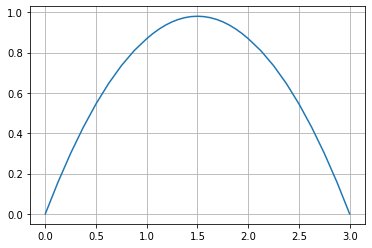

In [75]:
plt.plot(x7,uSlice2)
plt.grid()

In [76]:
def FDM (n,h):
    
    M4=np.zeros([n,n])

    M4[0][0] = 1

    for i in range(1,n-1):
        M4[i][i-1] = -2 
        M4[i][i] = 4 
        M4[i][i+1] = -2

    M4[n-1][n-1] = 1

    M4 *= 1./(2.*h*h)

    return M4

In [77]:
MFDM=FDM (49,0.0625)
len(MFDM)

49

In [78]:
fFDM=np.zeros([49])
len(fFDM)

49

In [79]:
for i in range(1,48):
    fFDM[i] = 8/9
fFDM

array([0.        , 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.        ])

In [80]:
uFDM = np.linalg.solve(MFDM,fFDM)
uFDM

array([0.        , 0.08159722, 0.15972222, 0.234375  , 0.30555556,
       0.37326389, 0.4375    , 0.49826389, 0.55555556, 0.609375  ,
       0.65972222, 0.70659722, 0.75      , 0.78993056, 0.82638889,
       0.859375  , 0.88888889, 0.91493056, 0.9375    , 0.95659722,
       0.97222222, 0.984375  , 0.99305556, 0.99826389, 1.        ,
       0.99826389, 0.99305556, 0.984375  , 0.97222222, 0.95659722,
       0.9375    , 0.91493056, 0.88888889, 0.859375  , 0.82638889,
       0.78993056, 0.75      , 0.70659722, 0.65972222, 0.609375  ,
       0.55555556, 0.49826389, 0.4375    , 0.37326389, 0.30555556,
       0.234375  , 0.15972222, 0.08159722, 0.        ])

In [81]:
xFDM = np.arange(0,3.0625,0.0625)
xFDM
len (xFDM)

49

In [82]:
MFDM= FDM(4,1)
len(fFDM)

49

In [83]:
for i in range(1,3):
    fFDM[i] = -2
fFDM

array([ 0.        , -2.        , -2.        ,  0.88888889,  0.88888889,
        0.88888889,  0.88888889,  0.88888889,  0.88888889,  0.88888889,
        0.88888889,  0.88888889,  0.88888889,  0.88888889,  0.88888889,
        0.88888889,  0.88888889,  0.88888889,  0.88888889,  0.88888889,
        0.88888889,  0.88888889,  0.88888889,  0.88888889,  0.88888889,
        0.88888889,  0.88888889,  0.88888889,  0.88888889,  0.88888889,
        0.88888889,  0.88888889,  0.88888889,  0.88888889,  0.88888889,
        0.88888889,  0.88888889,  0.88888889,  0.88888889,  0.88888889,
        0.88888889,  0.88888889,  0.88888889,  0.88888889,  0.88888889,
        0.88888889,  0.88888889,  0.88888889,  0.        ])

Text(0.5, 1.0, 'Quadratic solution ')

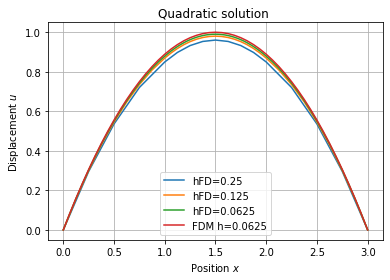

In [84]:
plt.grid()
plt.plot(x20,uSlice,label="hFD=0.25")
plt.plot(x7,uSlice2,label="hFD=0.125")
plt.plot(x11,uSlice3,label="hFD=0.0625")
plt.plot(xFDM,uFDM,label= "FDM h=0.0625")
plt.legend()
plt.xlabel(r"Position $x$")
plt.ylabel(r"Displacement $u$")
plt.title(r"Quadratic solution ")

In [85]:
MFDM=FDM (49*2-1,0.0625/2)
len(MFDM)

97

In [86]:
fFDM=np.zeros([49*2-1])
len(fFDM)

97

In [87]:
len(uSlice3)

65

In [88]:
x = np.arange(0,3+0.0625/2,0.0625/2)
x

array([0.     , 0.03125, 0.0625 , 0.09375, 0.125  , 0.15625, 0.1875 ,
       0.21875, 0.25   , 0.28125, 0.3125 , 0.34375, 0.375  , 0.40625,
       0.4375 , 0.46875, 0.5    , 0.53125, 0.5625 , 0.59375, 0.625  ,
       0.65625, 0.6875 , 0.71875, 0.75   , 0.78125, 0.8125 , 0.84375,
       0.875  , 0.90625, 0.9375 , 0.96875, 1.     , 1.03125, 1.0625 ,
       1.09375, 1.125  , 1.15625, 1.1875 , 1.21875, 1.25   , 1.28125,
       1.3125 , 1.34375, 1.375  , 1.40625, 1.4375 , 1.46875, 1.5    ,
       1.53125, 1.5625 , 1.59375, 1.625  , 1.65625, 1.6875 , 1.71875,
       1.75   , 1.78125, 1.8125 , 1.84375, 1.875  , 1.90625, 1.9375 ,
       1.96875, 2.     , 2.03125, 2.0625 , 2.09375, 2.125  , 2.15625,
       2.1875 , 2.21875, 2.25   , 2.28125, 2.3125 , 2.34375, 2.375  ,
       2.40625, 2.4375 , 2.46875, 2.5    , 2.53125, 2.5625 , 2.59375,
       2.625  , 2.65625, 2.6875 , 2.71875, 2.75   , 2.78125, 2.8125 ,
       2.84375, 2.875  , 2.90625, 2.9375 , 2.96875, 3.     ])

In [89]:
x[0:32:2]

array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
       0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375])

In [90]:
x[len(x)-33:len(x):2]

array([2.    , 2.0625, 2.125 , 2.1875, 2.25  , 2.3125, 2.375 , 2.4375,
       2.5   , 2.5625, 2.625 , 2.6875, 2.75  , 2.8125, 2.875 , 2.9375,
       3.    ])

In [91]:
for i in range(1,49*2-2):
    fFDM[i] = 8/9
fFDM

array([0.        , 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888

In [92]:
uFDM4 = np.linalg.solve(MFDM,fFDM)
uFDM4

array([0.        , 0.04123264, 0.08159722, 0.12109375, 0.15972222,
       0.19748264, 0.234375  , 0.27039931, 0.30555556, 0.33984375,
       0.37326389, 0.40581597, 0.4375    , 0.46831597, 0.49826389,
       0.52734375, 0.55555556, 0.58289931, 0.609375  , 0.63498264,
       0.65972222, 0.68359375, 0.70659722, 0.72873264, 0.75      ,
       0.77039931, 0.78993056, 0.80859375, 0.82638889, 0.84331597,
       0.859375  , 0.87456597, 0.88888889, 0.90234375, 0.91493056,
       0.92664931, 0.9375    , 0.94748264, 0.95659722, 0.96484375,
       0.97222222, 0.97873264, 0.984375  , 0.98914931, 0.99305556,
       0.99609375, 0.99826389, 0.99956597, 1.        , 0.99956597,
       0.99826389, 0.99609375, 0.99305556, 0.98914931, 0.984375  ,
       0.97873264, 0.97222222, 0.96484375, 0.95659722, 0.94748264,
       0.9375    , 0.92664931, 0.91493056, 0.90234375, 0.88888889,
       0.87456597, 0.859375  , 0.84331597, 0.82638889, 0.80859375,
       0.78993056, 0.77039931, 0.75      , 0.72873264, 0.70659

In [93]:
x[33:len(uFDM4)-34:1]

array([1.03125, 1.0625 , 1.09375, 1.125  , 1.15625, 1.1875 , 1.21875,
       1.25   , 1.28125, 1.3125 , 1.34375, 1.375  , 1.40625, 1.4375 ,
       1.46875, 1.5    , 1.53125, 1.5625 , 1.59375, 1.625  , 1.65625,
       1.6875 , 1.71875, 1.75   , 1.78125, 1.8125 , 1.84375, 1.875  ,
       1.90625, 1.9375 ])

In [94]:
xSlice = np.array(np.concatenate((x[0:31:2],x[32:len(uFDM4)-31:1],x[len(uFDM4)-32:len(uFDM4):2])))

In [95]:
len(xSlice)

66

In [96]:
xSlice

array([0.     , 0.0625 , 0.125  , 0.1875 , 0.25   , 0.3125 , 0.375  ,
       0.4375 , 0.5    , 0.5625 , 0.625  , 0.6875 , 0.75   , 0.8125 ,
       0.875  , 0.9375 , 1.     , 1.03125, 1.0625 , 1.09375, 1.125  ,
       1.15625, 1.1875 , 1.21875, 1.25   , 1.28125, 1.3125 , 1.34375,
       1.375  , 1.40625, 1.4375 , 1.46875, 1.5    , 1.53125, 1.5625 ,
       1.59375, 1.625  , 1.65625, 1.6875 , 1.71875, 1.75   , 1.78125,
       1.8125 , 1.84375, 1.875  , 1.90625, 1.9375 , 1.96875, 2.     ,
       2.03125, 2.03125, 2.09375, 2.15625, 2.21875, 2.28125, 2.34375,
       2.40625, 2.46875, 2.53125, 2.59375, 2.65625, 2.71875, 2.78125,
       2.84375, 2.90625, 2.96875])

In [97]:
len(x11)

65

In [98]:
for i in range(1,49*2-2):
    fFDM[i] = 8/9
fFDM

array([0.        , 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888

In [99]:
uFDM4Slice = np.array(np.concatenate((uFDM4[0:33:2],uFDM4[33:len(uFDM4)-33:1],uFDM4[len(uFDM4)-33:len(uFDM4):2])))


In [100]:
MFDM2=FDM(25*2-1,0.125/2)
len(MFDM2)

49

In [101]:
fFDM2=np.zeros([25*2-1])
len(fFDM2)

49

In [102]:
for i in range(1,25*2-2):
    fFDM2[i] = 8/9
fFDM2

array([0.        , 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.        ])

In [103]:
uFDM5 = np.linalg.solve(MFDM2,fFDM2)
uFDM5

array([0.        , 0.08159722, 0.15972222, 0.234375  , 0.30555556,
       0.37326389, 0.4375    , 0.49826389, 0.55555556, 0.609375  ,
       0.65972222, 0.70659722, 0.75      , 0.78993056, 0.82638889,
       0.859375  , 0.88888889, 0.91493056, 0.9375    , 0.95659722,
       0.97222222, 0.984375  , 0.99305556, 0.99826389, 1.        ,
       0.99826389, 0.99305556, 0.984375  , 0.97222222, 0.95659722,
       0.9375    , 0.91493056, 0.88888889, 0.859375  , 0.82638889,
       0.78993056, 0.75      , 0.70659722, 0.65972222, 0.609375  ,
       0.55555556, 0.49826389, 0.4375    , 0.37326389, 0.30555556,
       0.234375  , 0.15972222, 0.08159722, 0.        ])

In [104]:
xSlice2 = np.array(np.concatenate((x[0:17:2],x[17:len(x)-17:1],x[len(x)-17:len(x):2])))
xSlice2

array([0.     , 0.0625 , 0.125  , 0.1875 , 0.25   , 0.3125 , 0.375  ,
       0.4375 , 0.5    , 0.53125, 0.5625 , 0.59375, 0.625  , 0.65625,
       0.6875 , 0.71875, 0.75   , 0.78125, 0.8125 , 0.84375, 0.875  ,
       0.90625, 0.9375 , 0.96875, 1.     , 1.03125, 1.0625 , 1.09375,
       1.125  , 1.15625, 1.1875 , 1.21875, 1.25   , 1.28125, 1.3125 ,
       1.34375, 1.375  , 1.40625, 1.4375 , 1.46875, 1.5    , 1.53125,
       1.5625 , 1.59375, 1.625  , 1.65625, 1.6875 , 1.71875, 1.75   ,
       1.78125, 1.8125 , 1.84375, 1.875  , 1.90625, 1.9375 , 1.96875,
       2.     , 2.03125, 2.0625 , 2.09375, 2.125  , 2.15625, 2.1875 ,
       2.21875, 2.25   , 2.28125, 2.3125 , 2.34375, 2.375  , 2.40625,
       2.4375 , 2.46875, 2.5    , 2.5625 , 2.625  , 2.6875 , 2.75   ,
       2.8125 , 2.875  , 2.9375 , 3.     ])

In [105]:
uFDM5Slice = np.array(np.concatenate((uFDM5[0:17:2],uFDM5[17:len(uFDM5)-17:1],uFDM5[len(uFDM5)-17:len(uFDM5):2])))  
len(uFDM5Slice)


33

In [106]:
uSlice2-uFDM5Slice

array([ 1.16573418e-15, -2.45523188e-03, -4.91046376e-03, -7.36569564e-03,
       -9.82092752e-03, -1.22761594e-02, -1.47313913e-02, -1.71866232e-02,
       -1.96418550e-02, -1.97290990e-02, -1.97141303e-02, -1.97166985e-02,
       -1.97162579e-02, -1.97163335e-02, -1.97163205e-02, -1.97163228e-02,
       -1.97163223e-02, -1.97163228e-02, -1.97163205e-02, -1.97163335e-02,
       -1.97162579e-02, -1.97166985e-02, -1.97141303e-02, -1.97290990e-02,
       -1.96418550e-02, -1.71866232e-02, -1.47313913e-02, -1.22761594e-02,
       -9.82092752e-03, -7.36569564e-03, -4.91046376e-03, -2.45523188e-03,
        0.00000000e+00])

In [107]:
MFDM3=FDM(13*2-1,0.25/2)
len(MFDM3)

25

In [108]:
fFDM3=np.zeros([13*2-1])
len(fFDM3)

25

In [109]:
for i in range(1,13*2-2):
    fFDM3[i] = 8/9
fFDM3

array([0.        , 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.        ])

In [110]:
uFDM6 = np.linalg.solve(MFDM3,fFDM3)
uFDM6

array([0.        , 0.15972222, 0.30555556, 0.4375    , 0.55555556,
       0.65972222, 0.75      , 0.82638889, 0.88888889, 0.9375    ,
       0.97222222, 0.99305556, 1.        , 0.99305556, 0.97222222,
       0.9375    , 0.88888889, 0.82638889, 0.75      , 0.65972222,
       0.55555556, 0.4375    , 0.30555556, 0.15972222, 0.        ])

In [111]:
xSlice3 = np.array(np.concatenate((x[0:10:2],x[9:len(x)-9:1],x[len(x)-9:len(x):2])))
xSlice3

array([0.     , 0.0625 , 0.125  , 0.1875 , 0.25   , 0.28125, 0.3125 ,
       0.34375, 0.375  , 0.40625, 0.4375 , 0.46875, 0.5    , 0.53125,
       0.5625 , 0.59375, 0.625  , 0.65625, 0.6875 , 0.71875, 0.75   ,
       0.78125, 0.8125 , 0.84375, 0.875  , 0.90625, 0.9375 , 0.96875,
       1.     , 1.03125, 1.0625 , 1.09375, 1.125  , 1.15625, 1.1875 ,
       1.21875, 1.25   , 1.28125, 1.3125 , 1.34375, 1.375  , 1.40625,
       1.4375 , 1.46875, 1.5    , 1.53125, 1.5625 , 1.59375, 1.625  ,
       1.65625, 1.6875 , 1.71875, 1.75   , 1.78125, 1.8125 , 1.84375,
       1.875  , 1.90625, 1.9375 , 1.96875, 2.     , 2.03125, 2.0625 ,
       2.09375, 2.125  , 2.15625, 2.1875 , 2.21875, 2.25   , 2.28125,
       2.3125 , 2.34375, 2.375  , 2.40625, 2.4375 , 2.46875, 2.5    ,
       2.53125, 2.5625 , 2.59375, 2.625  , 2.65625, 2.6875 , 2.71875,
       2.75   , 2.8125 , 2.875  , 2.9375 , 3.     ])

In [112]:
uFDM6Slice = np.array(np.concatenate((uFDM6[0:10:2],uFDM6[9:len(uFDM6)-9:1],uFDM6[len(uFDM6)-9:len(uFDM6):2])))  
len(uFDM6Slice)

17

In [113]:
uSlice-uFDM6Slice

array([ 1.11022302e-16, -9.82092708e-03, -1.96418542e-02, -2.94627812e-02,
       -3.92837083e-02, -3.96326858e-02, -3.95728021e-02, -3.95831268e-02,
       -3.95810619e-02, -3.95831268e-02, -3.95728021e-02, -3.96326858e-02,
       -3.92837083e-02, -2.94627812e-02, -1.96418542e-02, -9.82092708e-03,
        0.00000000e+00])

Text(0.5, 0, 'position')

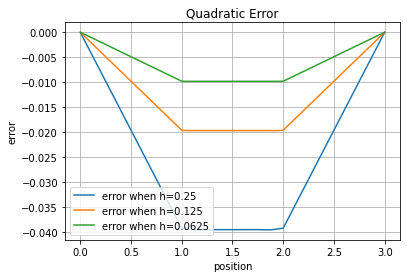

In [114]:
plt.plot(x20,uSlice-uFDM6Slice,label="error when h=0.25")
plt.plot(x7,uSlice2-uFDM5Slice,label="error when h=0.125")
plt.plot(x11,uSlice3-uFDM4Slice,label="error when h=0.0625")
plt.legend()
plt.grid()
plt.title("Quadratic Error")
plt.ylabel("error")
plt.xlabel("position")